# Random Forest

# Importing necessary libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Preprocessing

In [2]:
data = pd.read_excel('glass.xlsx', sheet_name='glass')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.shape

(214, 10)

In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Data Visualization

In [7]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


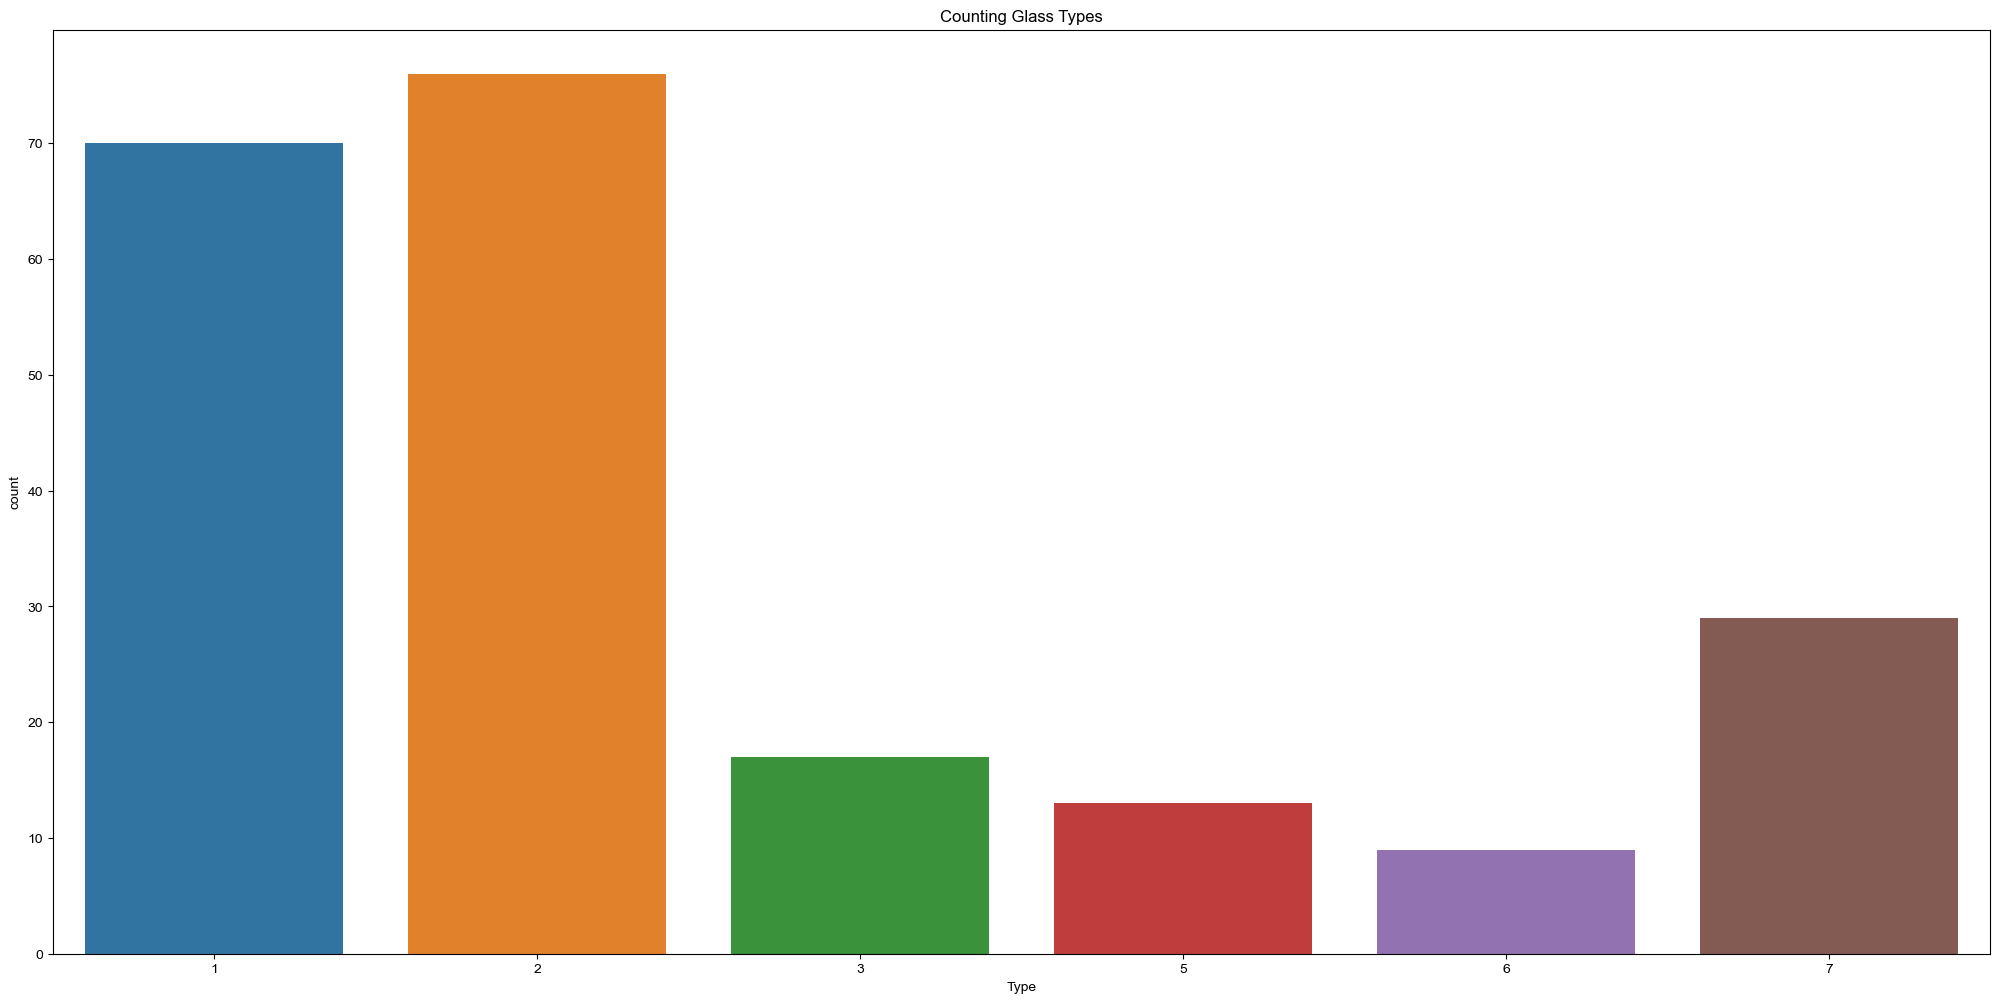

In [8]:
plt.subplots(figsize = (25,12))
sns.countplot('Type', data = data).set_title('Counting Glass Types')
sns.set(style='whitegrid', font_scale=2)

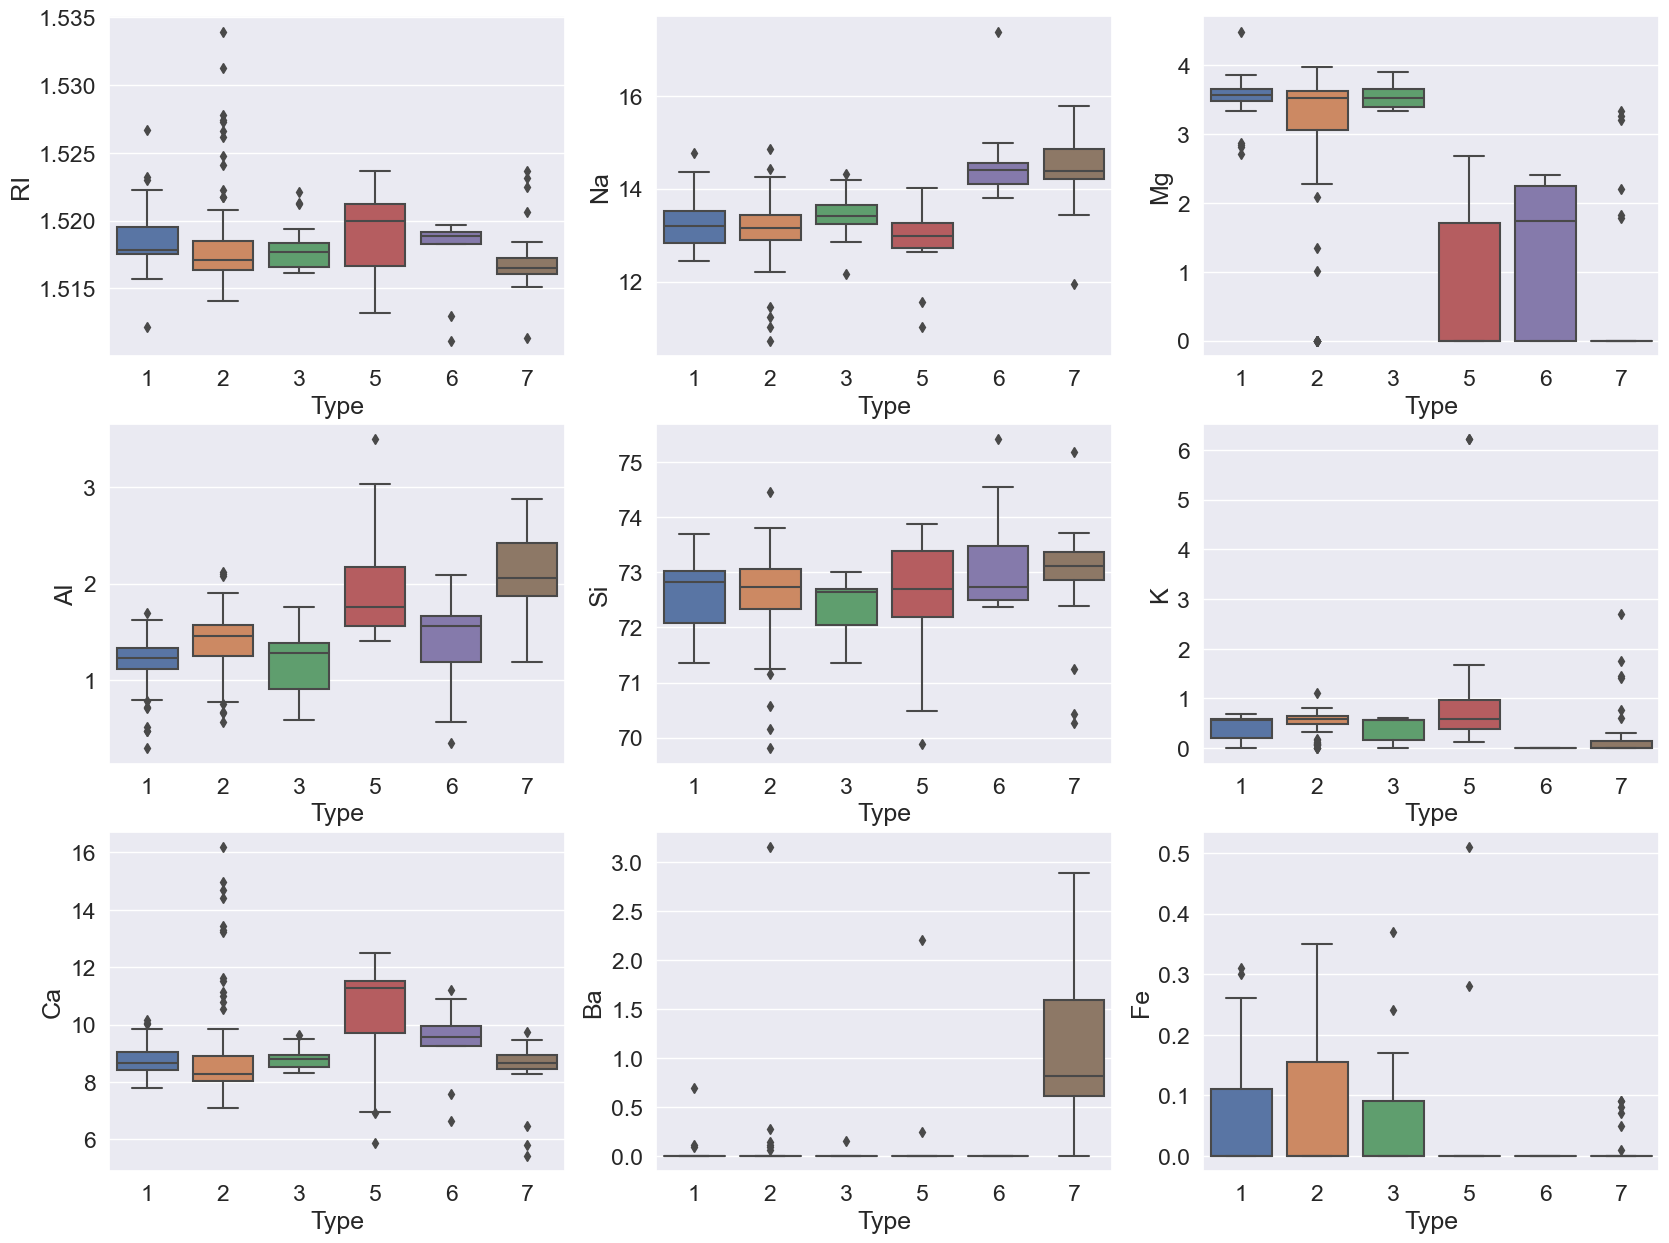

In [9]:
sns.set(style="darkgrid", font_scale=1.5)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data= data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data= data)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data= data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data= data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data= data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data= data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data= data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data= data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data= data)
plt.show()


<AxesSubplot:>

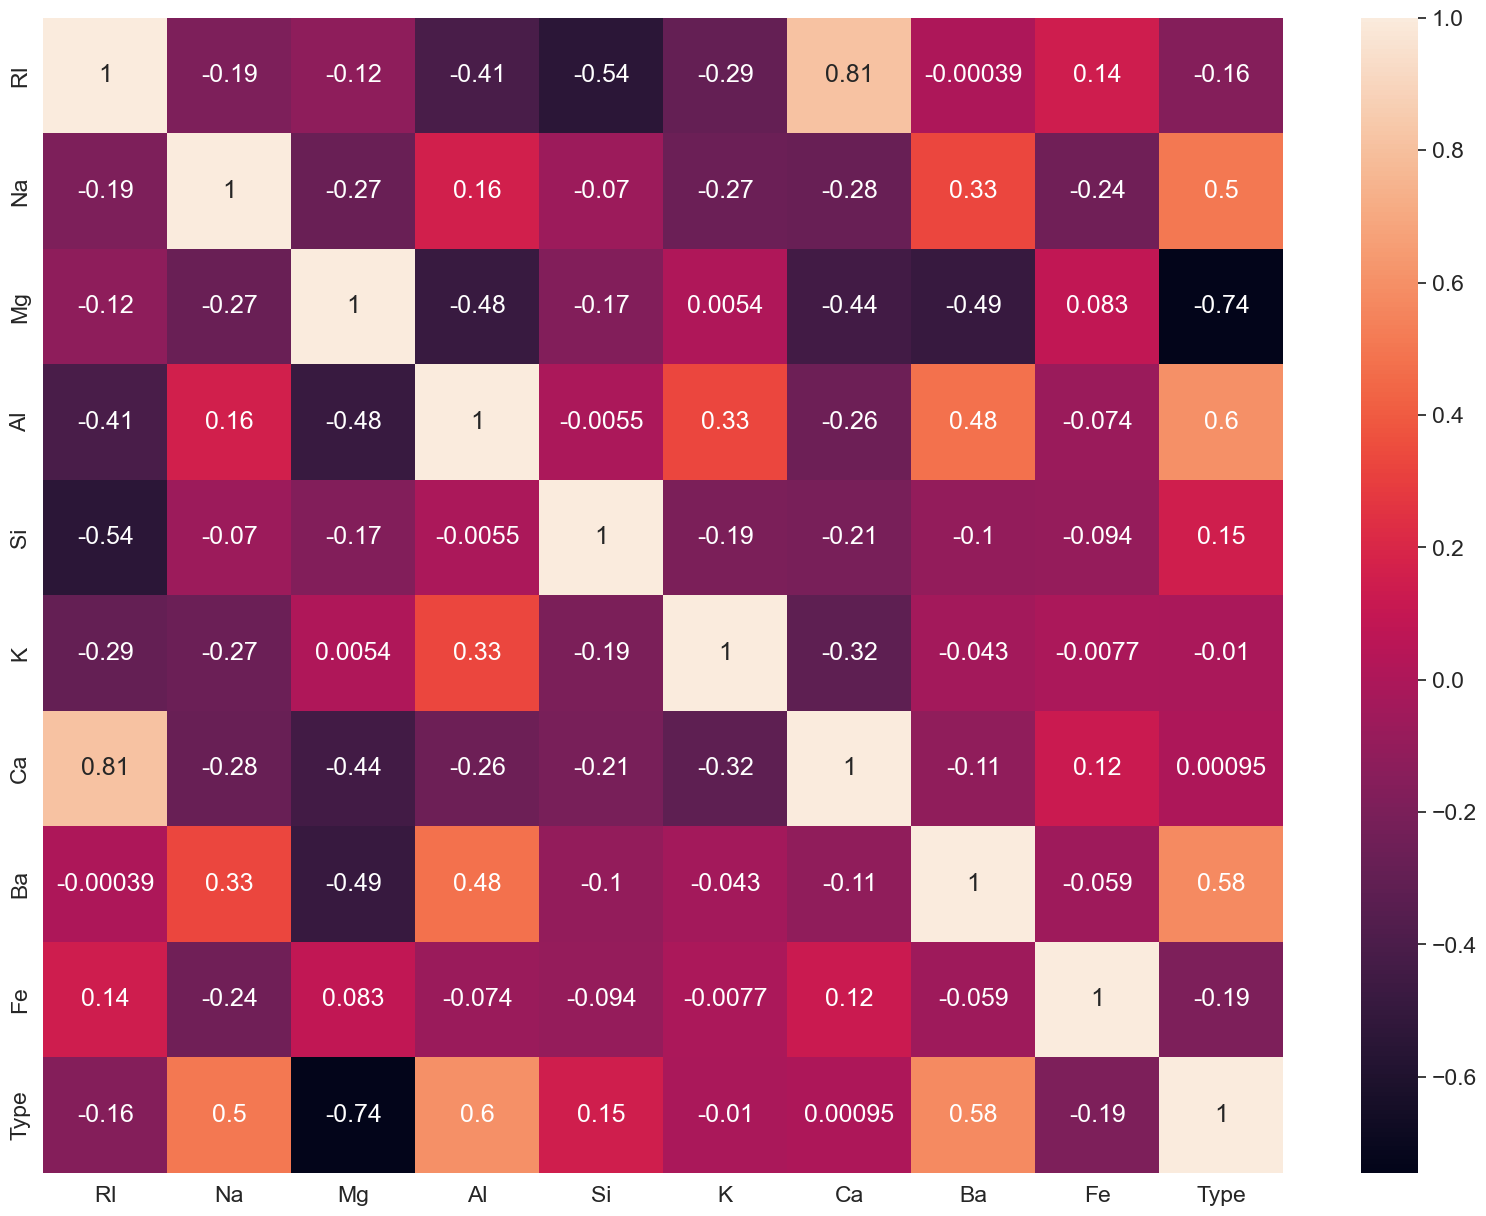

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot = True)

# Split Data for Training and Testing

In [11]:
#importing packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
x_data = data.drop(['Type'],axis=1)
y_data= data['Type'].values

In [13]:
#Splitting the data set into testing and training
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=.3,random_state=25)

In [14]:
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# Apply different Classification Algorithms and tune them

In [15]:
# Decision Tree
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
y_pred = d_tree.predict(x_test)
decision_tree = metrics.accuracy_score(y_pred,y_test)

# Random Forest
Rand_f = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
Rand_f.fit(x_train, y_train)
y_pred = Rand_f.predict(x_test)
random_forest = metrics.accuracy_score(y_pred,y_test)

# Support Vector Machines
svm  = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
s_vector  = metrics.accuracy_score(y_pred,y_test)

Get performance metrics for all the applied classifiers

In [16]:
pd.DataFrame([['Decision Tree',decision_tree]],columns = ['Model','Accuracy'])


,Model,Accuracy
0,Decision Tree,0.707692


In [17]:
pd.DataFrame([['Random Forest',random_forest]],columns = ['Model','Accuracy'])


,Model,Accuracy
0,Random Forest,0.738462


In [18]:
pd.DataFrame([['Support Vector Machines',s_vector]],columns = ['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machines,0.384615


Clearly we can see Random forest has high accuracy than remaining.

# Hyper Tuning

In [19]:
param_grid = { "criterion" : ["gini", "entropy"]
              , "min_samples_leaf" : [1, 5, 10]
              , "min_samples_split" : [2, 4, 10, 12, 16]
              , "n_estimators": [100, 125, 200]}
grid = GridSearchCV(estimator = Rand_f,param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print("Best parameters set are:")
print()
print(grid.best_params_)

Best parameters set are:

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Running the final model

In [20]:
model = grid.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

0.7384615384615385

# Model performance

Text(601.25, 0.5, 'Predicted label')

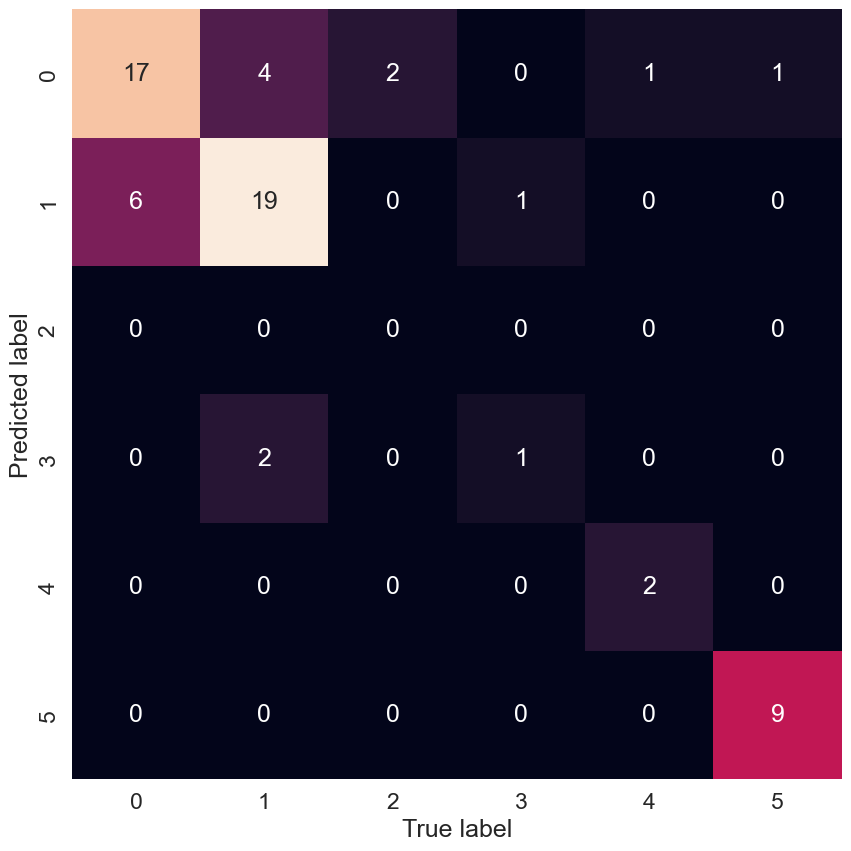

In [21]:
matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(20,10))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.74      0.71        23
           2       0.73      0.76      0.75        25
           3       0.00      0.00      0.00         2
           5       0.33      0.50      0.40         2
           6       1.00      0.67      0.80         3
           7       1.00      0.90      0.95        10

    accuracy                           0.74        65
   macro avg       0.62      0.59      0.60        65
weighted avg       0.73      0.74      0.73        65



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bagging and Boosting Methods

In [28]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10,)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7585714285714285


In [29]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.42142857142857143


# Additional notes in separate word file.